In [48]:
import pandas as pd
import numpy as np

covid_data=pd.read_csv("super_covid_data.csv")
super_covid=pd.DataFrame(covid_data)
super_covid.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [75]:
#Q1
newjersey_data = super_covid[super_covid['State_x'] == 'NJ']

columns_cases = [col for col in newjersey_data if col.endswith('x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in newjersey_data if col.endswith('y') and '2020-07' <= col.split('_')[0] <= '2020-12']

def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

weekly_cases_stats = calculate_weekly_stats(newjersey_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(newjersey_data, columns_deaths)

print("Weekly Cases Stats:")
print(weekly_cases_stats.head())
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())

Weekly Cases Stats:
                   mean  median   mode
date                                  
2020-07-05  8185.885714  6790.0  16297
2020-07-12  8264.244898  6864.0  16297
2020-07-19  8354.326531  6932.0  16297
2020-07-26  8442.666667  7016.0  16297
2020-08-02  8593.312925  7109.0    865

Weekly Deaths Stats:
                  mean  median  mode
date                                
2020-07-05  721.419048   529.0   124
2020-07-12  733.360544   546.0    77
2020-07-19  744.210884   557.0   195
2020-07-26  748.687075   564.0   124
2020-08-02  751.598639   571.0   124


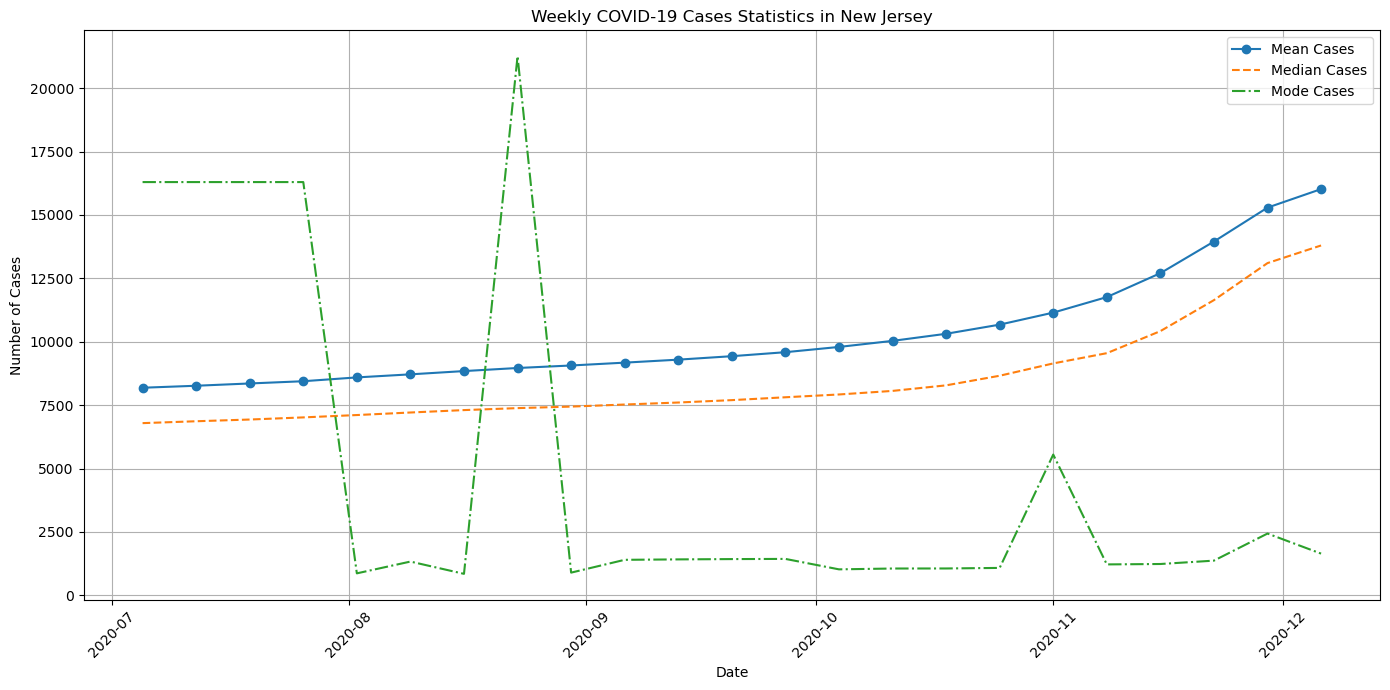

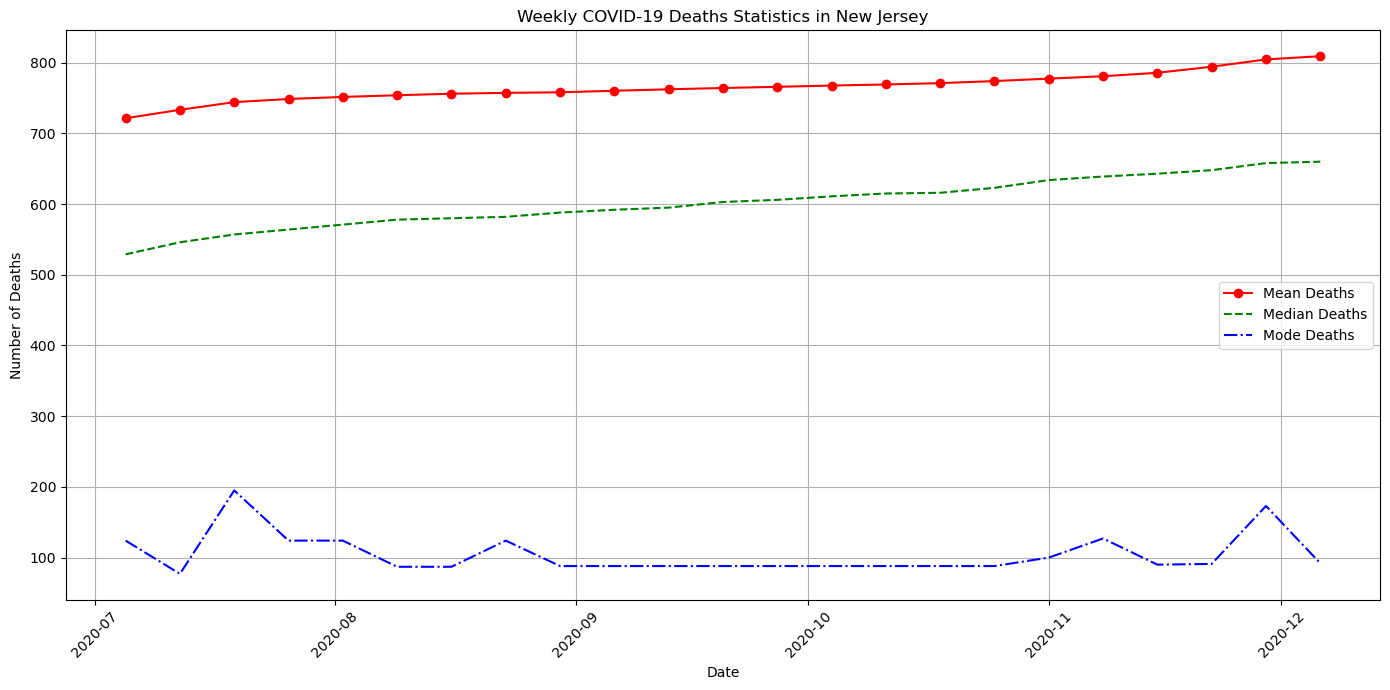

In [79]:
#Q2
super_data = pd.read_csv('super_covid_data.csv')
jewjersey_data = super_data[super_data['State_x'] == 'NJ']
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mean'], label='Mean Cases', marker='o')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['median'], label='Median Cases', linestyle='--')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mode'], label='Mode Cases', linestyle='-.')
plt.title('Weekly COVID-19 Cases Statistics in New Jersey')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mean'], label='Mean Deaths', marker='o', color='red')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['median'], label='Median Deaths', linestyle='--', color='green')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mode'], label='Mode Deaths', linestyle='-.', color='blue')
plt.title('Weekly COVID-19 Deaths Statistics in New Jersey')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

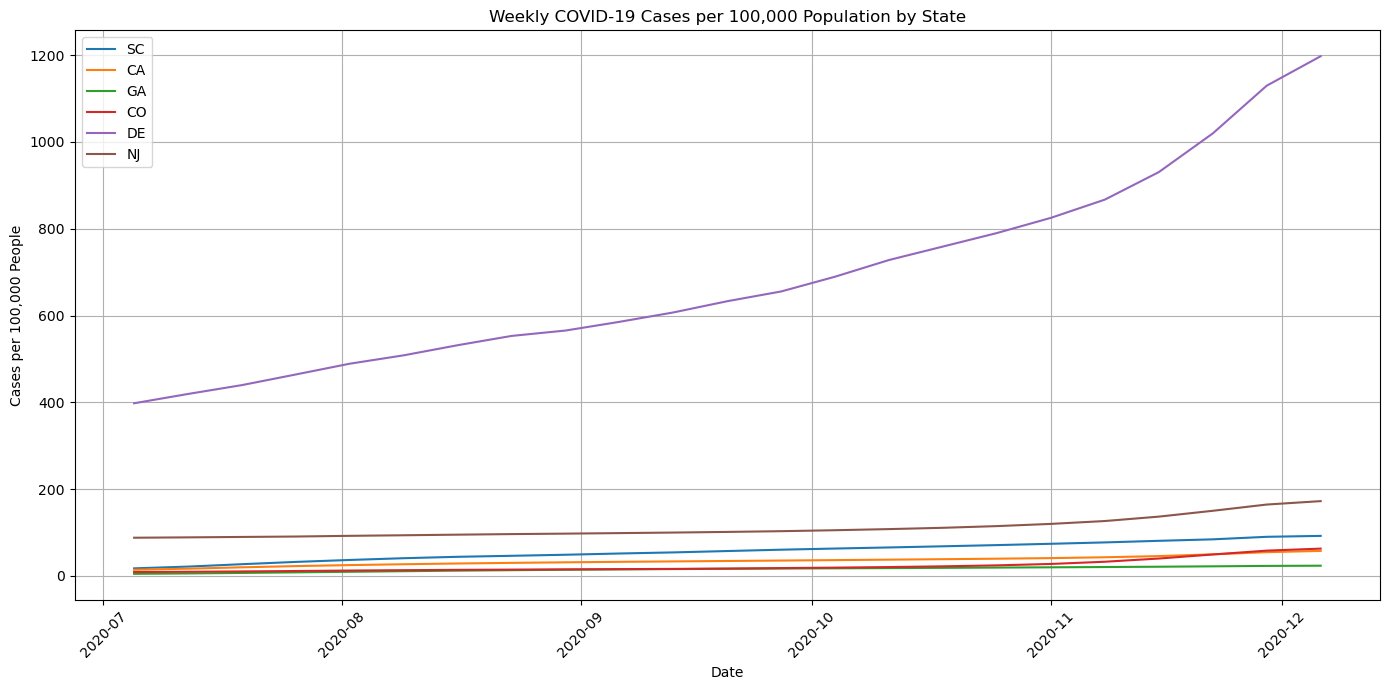

In [83]:
#Q2
population = {
    #Wills states
    'SC': 5118425,
    'CA': 39538223,
    'GA': 10711908,
    'CO': 5773714,
    'DE': 989948,
    'NJ': 9288994,
}


def prepare_state_data(state_code):
    state_data = super_data[super_data['State_x'] == state_code]
    columns_cases = [col for col in state_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
    columns_deaths = [col for col in state_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']
    weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)

    weekly_cases_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population[state_code]) * 100000
    weekly_deaths_stats[['mean', 'median']] = (weekly_deaths_stats[['mean', 'median']] / population[state_code]) * 100000
    return weekly_cases_stats['mean'], weekly_deaths_stats['mean'] 
plt.figure(figsize=(14, 7))

for state_code in ['SC', 'CA', 'GA', 'CO', 'DE', 'NJ']:
    weekly_cases_mean, _ = prepare_state_data(state_code)
    plt.plot(weekly_cases_mean.index, weekly_cases_mean, label=state_code)

plt.title('Weekly COVID-19 Cases per 100,000 Population by State')
plt.xlabel('Date')
plt.ylabel('Cases per 100,000 People')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Describe why the rates differ across these states in the notebook.
#The rates differ accross these states due to varying population sizes.Local/state politics likely plays a factor in infection rates and deaths as well
#Identify the peaks, do they compare with the US pattern?
#The peaks for the state data correlated with the trends observed in the US pattern

In [87]:
#Q3
import pandas as pd

# Choosing New Jersey as the state of interest
state_of_interest = 'NJ'

# Filter data for the selected state
state_data = super_covid[super_covid['State_x'] == state_of_interest]

# Extract columns for cases and deaths within the specified date range
columns_cases = [col for col in state_data if col.endswith('x') and '2020-07-01' <= col.split('_')[0] <= '2020-12-27']
columns_deaths = [col for col in state_data if col.endswith('y') and '2020-07-01' <= col.split('_')[0] <= '2020-12-01']

# Function to calculate weekly statistics
def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

# Calculate weekly statistics for cases and deaths
weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)

# Calculate total cases and deaths for each county
total_cases = state_data[columns_cases].sum(axis=1)
total_deaths = state_data[columns_deaths].sum(axis=1)

# Create a DataFrame to store total cases and deaths for each county
county_stats = pd.DataFrame({'Total Cases': total_cases, 'Total Deaths': total_deaths})

# Sort counties based on total cases and deaths
sorted_counties_cases = county_stats.sort_values(by='Total Cases', ascending=False)
sorted_counties_deaths = county_stats.sort_values(by='Total Deaths', ascending=False)

# Select the top five counties with high cases and death rates
top_five_cases = sorted_counties_cases.head(5)
top_five_deaths = sorted_counties_deaths.head(5)

print("Top 5 Counties with High Cases:")
print(top_five_cases)

print("\nTop 5 Counties with High Deaths:")
print(top_five_deaths)

Top 5 Counties with High Cases:
      Total Cases  Total Deaths
1775      4657705        315306
1780      4551833        327239
1782      4323748        233228
1785      4100641        219071
1789      3975644        192786

Top 5 Counties with High Deaths:
      Total Cases  Total Deaths
1780      4551833        327239
1775      4657705        315306
1782      4323748        233228
1785      4100641        219071
1793      3737777        209665


In [104]:
#Q3
newjersey_data = super_covid[super_covid['State_x'] == 'NJ'].copy()

start_date = '2020-07-01'
end_date = '2020-12-31'

cases_columns = [col for col in state_data.columns if col >= start_date and col <= end_date and col.endswith('_x')]
deaths_columns = [col for col in state_data.columns if col >= start_date and col <= end_date and col.endswith('_y')]

newjersey_data['total_cases'] = newjersey_data[cases_columns].sum(axis=1)
newjersey_data['total_deaths'] = newjersey_data[deaths_columns].sum(axis=1)

top_counties_cases = newjersey_data.sort_values(by='total_cases', ascending=False).head(5)
top_counties_deaths = newjersey_data.sort_values(by='total_deaths', ascending=False).head(5)

print("Top 5 Counties in New Jersey by Total Cases (July 2020 - December 2020):")
print(top_counties_cases[['County Name_x', 'total_cases']])
print("\nTop 5 Counties in New Jersey by Total Deaths (July 2020 - December 2020):")
print(top_counties_deaths[['County Name_x', 'total_deaths']])

Top 5 Counties in New Jersey by Total Cases (July 2020 - December 2020):
          County Name_x  total_cases
1775     Bergen County       4804977
1780      Essex County       4698248
1782     Hudson County       4459069
1785  Middlesex County       4237740
1789    Passaic County       4099755

Top 5 Counties in New Jersey by Total Deaths (July 2020 - December 2020):
          County Name_x  total_deaths
1780      Essex County         394298
1775     Bergen County         379767
1782     Hudson County         280892
1785  Middlesex County         264651
1793      Union County         252883


In [114]:
bergen_df = super_covid[super_covid['County Name'] == 'Bergen County']
essex_df = super_covid[super_covid['County Name'] == 'Essex County']
hudson_df = super_covid[super_covid['County Name'] == 'Hudson County']
middlesex_df = super_covid[super_covid['County Name'] == 'Middlesex County']
passaic_df = super_covid[super_covid['County Name'] == 'Passaic County']
union_df = super_covid[super_covid['County Name'] == 'Union County']

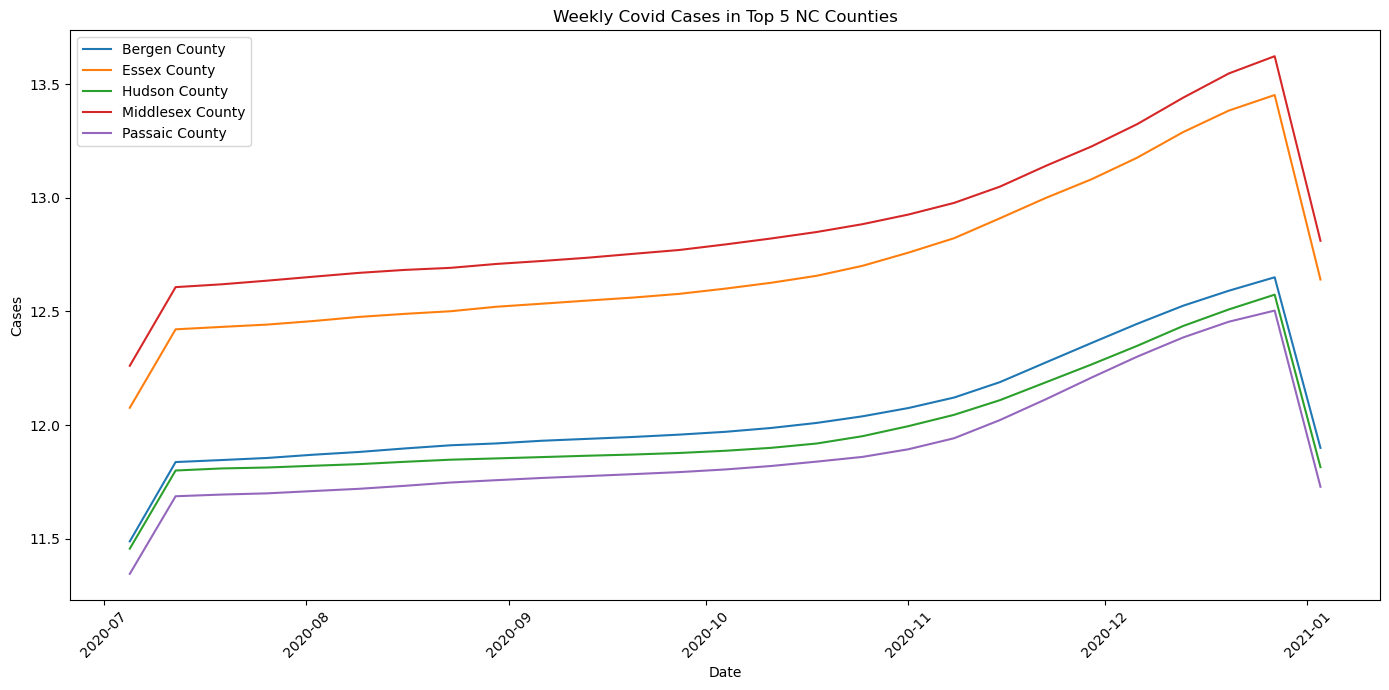

In [122]:
#Q4
def calculate_weekly_stats_2(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])

    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))

    weekly_stats = weekly_data.sum()

    return weekly_stats

cases_bergen = calculate_weekly_stats_2(bergen_df, cases_columns)
cases_essex = calculate_weekly_stats_2(essex_df, cases_columns)
cases_hudson = calculate_weekly_stats_2(hudson_df, cases_columns)
cases_middlesex = calculate_weekly_stats_2(middlesex_df, cases_columns)
cases_passaic = calculate_weekly_stats_2(passaic_df, cases_columns)

plt.figure(figsize=(14, 7))


plt.plot(cases_bergen.index, np.log(cases_bergen['count']), label="Bergen County")
plt.plot(cases_essex.index, np.log(cases_essex['count']), label="Essex County")
plt.plot(cases_hudson.index, np.log(cases_hudson['count']), label="Hudson County")
plt.plot(cases_middlesex.index, np.log(cases_middlesex['count']), label="Middlesex County")
plt.plot(cases_passaic.index, np.log(cases_passaic['count']), label="Passaic County")

plt.title("Weekly Covid Cases in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Describe what is causing them and what were the peaks. Do the counties follow state pattern.
#The increase in cases rates during the period of 2020-12 to 2021-01 can probably be explained by in increase in rate of
#holiday travel. More people are physically closer together leading to a higher likelyhood of transmission.The
#cases rates for the counties generally followed a similar trend as the cases rates observed in the entire state in terms of rates
#increasing around the christmas holiday

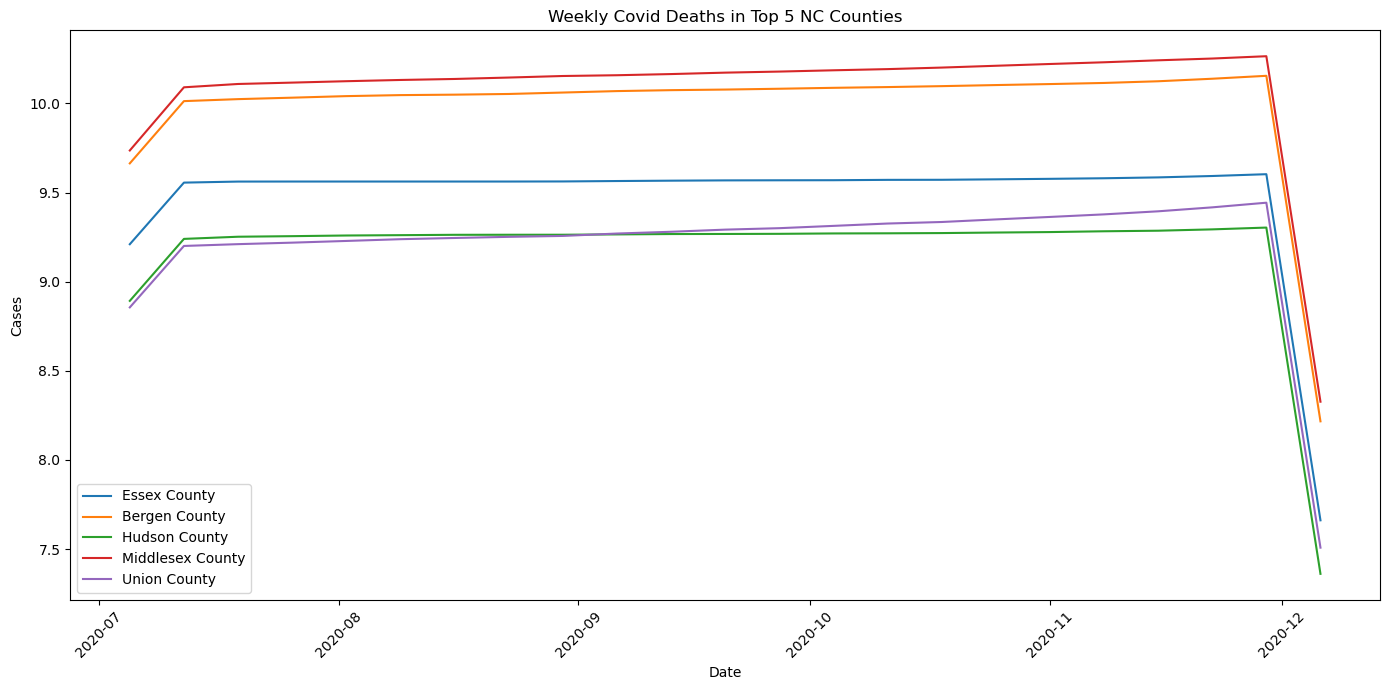

In [126]:
#Q4
def calculate_weekly_stats_2(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])

    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))

    weekly_stats = weekly_data.sum()

    return weekly_stats

cases_essex = calculate_weekly_stats_2(essex_df, columns_deaths)
cases_bergen = calculate_weekly_stats_2(bergen_df, columns_deaths)
cases_hudson = calculate_weekly_stats_2(hudson_df, columns_deaths)
cases_middlesex = calculate_weekly_stats_2(middlesex_df, columns_deaths)
cases_union = calculate_weekly_stats_2(union_df, columns_deaths)

plt.figure(figsize=(14, 7))

plt.plot(cases_bergen.index, np.log(cases_bergen['count']), label="Essex County")
plt.plot(cases_essex.index, np.log(cases_essex['count']), label="Bergen County")
plt.plot(cases_hudson.index, np.log(cases_hudson['count']), label="Hudson County")
plt.plot(cases_middlesex.index, np.log(cases_middlesex['count']), label="Middlesex County")
plt.plot(cases_union.index, np.log(cases_union['count']), label="Union County")

plt.title("Weekly Covid Deaths in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Describe what is causing them and what were the peaks. Do the counties follow state pattern.
#The increase in death rates during the period of 2020-12 to 2021-01 can probably be explained by in increase in rate of
#holiday travel. More people are physically closer together leading to a higher likelyhood of transmission and deaths.The
#death rates for the counties generally followed a similar trend as the death rates observed in the entire state in terms of rates
#increasing around the christmas holiday